In [31]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Read the Dataset

In [32]:
df = pd.read_csv('train.csv')
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [34]:
df.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df['defects'].value_counts()

defects
False    78699
True     23064
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for Defects'}, xlabel='defects'>

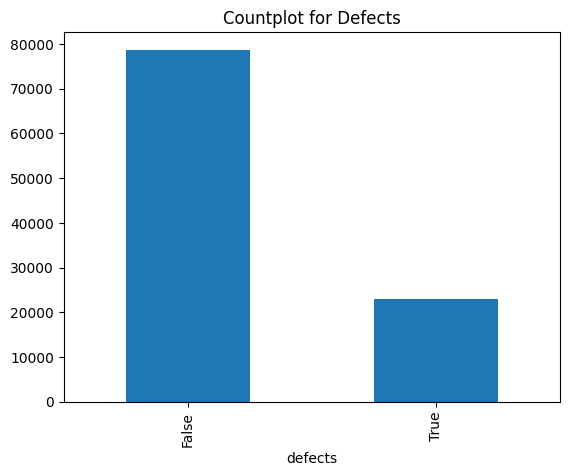

In [37]:
df['defects'].value_counts().plot(kind='bar', title='Countplot for Defects')

### Seperate x and y features

In [38]:
x =df.drop(columns=['id','defects'])
y = df[['defects']]

In [39]:
x.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [40]:
y.head()

,defects
0,False
1,False
2,False
3,True
4,False


### Seperate cat and con features

In [41]:
cat = list(x.columns[x.dtypes == 'object'])
con = list(x.columns[x.dtypes != 'object'])

In [42]:
cat

[]

In [43]:
con

['loc',
 'v(g)',
 'ev(g)',
 'iv(g)',
 'n',
 'v',
 'l',
 'd',
 'i',
 'e',
 'b',
 't',
 'lOCode',
 'lOComment',
 'lOBlank',
 'locCodeAndComment',
 'uniq_Op',
 'uniq_Opnd',
 'total_Op',
 'total_Opnd',
 'branchCount']

### Creating a preprocessing pipeline

In [44]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [88]:
x_pre = num_pipe.fit_transform(x)
x_pre

array([[-0.28108282, -0.31549702, -0.39838633, ..., -0.18776212,
        -0.24060855, -0.33578367],
       [-0.42760261, -0.44206622, -0.39838633, ..., -0.37908167,
        -0.35219708, -0.47455019],
       [-0.48254753, -0.44206622, -0.39838633, ..., -0.2834219 ,
        -0.31035138, -0.47455019],
       ...,
       [-0.20782293, -0.56863542, -0.39838633, ..., -0.06340441,
        -0.15691715, -0.61331671],
       [-0.50086251, -0.44206622, -0.39838633, ..., -0.32168581,
        -0.28245425, -0.47455019],
       [ 1.80682418,  1.583041  ,  3.27233773, ...,  0.9984191 ,
         1.33557943,  1.74571413]])

In [89]:
cols = num_pipe.get_feature_names_out()
cols

array(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b',
       't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype=object)

In [90]:
x_pre = pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,-0.281083,-0.315497,-0.398386,-0.270814,-0.214179,-0.204323,-0.515843,0.416261,-0.582895,-0.080835,...,-0.085032,-0.150553,-0.131124,-0.466893,-0.19682,0.608024,-0.365180,-0.187762,-0.240609,-0.335784
1,-0.427603,-0.442066,-0.398386,-0.270814,-0.377782,-0.304545,0.283395,-0.473180,-0.282763,-0.104512,...,-0.110448,-0.306233,-0.300547,-0.466893,-0.19682,-0.132770,-0.254463,-0.379082,-0.352197,-0.474550
2,-0.482548,-0.442066,-0.398386,-0.270814,-0.301824,-0.268048,-0.016319,-0.398824,-0.210574,-0.100223,...,-0.105844,-0.384072,-0.300547,-0.466893,-0.19682,0.015389,-0.254463,-0.283422,-0.310351,-0.474550
3,-0.537492,-0.568635,-0.398386,-0.451499,-0.430368,-0.349603,0.782918,-0.597106,-0.424954,-0.106942,...,-0.113057,-0.487858,-0.300547,-0.310211,-0.19682,-0.577246,-0.531254,-0.398214,-0.449837,-0.613317
4,-0.482548,-0.442066,-0.398386,-0.270814,-0.465426,-0.375627,0.683014,-0.570197,-0.662084,-0.107508,...,-0.113665,-0.410019,-0.300547,-0.310211,-0.19682,-0.725405,-0.531254,-0.455609,-0.407991,-0.474550


### Train Test Split

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.3, random_state=42)

In [93]:
xtrain.shape

(71234, 21)

In [94]:
xtrain.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
22212,-0.537492,-0.568635,-0.398386,-0.451499,-0.336881,-0.298139,1.881870,-0.733072,1.176770,-0.107139,...,-0.113268,-0.435965,-0.300547,-0.623576,-0.196820,-1.169881,-0.254463,-0.369516,-0.268506,-0.613317
15992,4.425865,3.987856,5.647512,3.884926,3.946003,3.950210,-0.815557,1.786538,5.116108,1.012345,...,1.088452,3.326280,5.120992,5.173683,5.809778,2.534088,5.668864,3.839514,3.818424,4.382278
10606,-0.281083,-0.442066,-0.398386,-0.451499,-0.307666,-0.270133,-0.016319,-0.331549,-0.258262,-0.100218,...,-0.105838,-0.150553,-0.131124,-0.466893,-0.196820,0.015389,-0.309822,-0.302554,-0.296403,-0.474550
64779,-0.244453,-0.315497,-0.398386,-0.270814,-0.237551,-0.227065,-0.216129,-0.189918,-0.213199,-0.095013,...,-0.100251,-0.202446,-0.300547,-0.153528,-0.196820,0.163548,-0.254463,-0.226026,-0.240609,-0.335784
98774,-0.482548,-0.315497,-0.398386,-0.270814,-0.430368,-0.351185,0.283395,-0.468223,-0.637146,-0.106013,...,-0.112060,-0.435965,0.038299,-0.466893,-0.196820,-0.132770,-0.475896,-0.436478,-0.394043,-0.335784


In [95]:
xtest.shape

(30529, 21)

In [96]:
xtest.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
35956,-0.299398,-0.315497,-0.398386,-0.090130,-0.149907,-0.144227,-0.116224,-0.225326,0.293875,-0.089225,...,-0.094037,-0.150553,-0.300547,-0.310211,-0.196820,0.311707,0.133044,-0.139932,-0.156917,-0.335784
60927,-0.152878,-0.188928,-0.398386,-0.270814,-0.173279,-0.175089,-0.316034,-0.063159,-0.001444,-0.087586,...,-0.092278,-0.150553,0.377145,0.003155,1.805379,0.459865,0.077686,-0.149498,-0.142969,-0.197017
79918,0.085217,0.697057,1.329013,0.271239,0.399331,0.263238,-0.615748,0.569222,0.972015,0.031748,...,0.035821,0.264591,-0.131124,0.003155,-0.196820,0.756183,0.741984,0.367065,0.414974,0.774348
50078,-0.537492,-0.568635,-0.398386,-0.451499,-0.523856,-0.408118,2.181584,-0.756441,-0.919777,-0.109118,...,-0.115392,-0.513805,-0.300547,-0.310211,-0.196820,-0.873564,-0.808045,-0.493873,-0.533528,-0.613317
44080,-0.592437,-0.568635,-0.398386,-0.451499,-0.482955,-0.386982,2.181584,-0.756441,-0.528206,-0.108695,...,-0.114938,-0.513805,-0.300547,-0.623576,-0.196820,-1.021722,-0.586613,-0.474741,-0.463786,-0.613317


In [97]:
ytrain.head()

,defects
22212,False
15992,True
10606,True
64779,False
98774,False


### Create a Random Forest model

In [98]:
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='entropy')
model.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=1)

In [99]:
model.score(xtrain, ytrain)

0.789721200550299

In [100]:
model.score(xtest, ytest)

0.7868911526745062

In [101]:
params = {'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9],
          'criterion':['gini', 'entropy']}

In [102]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [103]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'max_depth': 7,
 'criterion': 'entropy'}

In [104]:
rscv.best_score_

0.6858866758187034

In [105]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=7)

### Evaluate Model in train and test

In [106]:
best_rfc.score(xtrain, ytrain)

0.8184434399303703

In [107]:
best_rfc.score(xtest, ytest)

0.8160437616692325

### Predict results for train and test

In [108]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [109]:
ypred_tr[0:5]

array([False,  True, False, False, False])

In [110]:
ytrain.head()

,defects
22212,False
15992,True
10606,True
64779,False
98774,False


In [111]:
ypred_ts[0:5]

array([False, False, False, False, False])

In [112]:
ytest.head()

,defects
35956,False
60927,True
79918,False
50078,False
44080,False


### Create Confusion matrix for test results

In [113]:
best_rfc.classes_

array([False,  True])

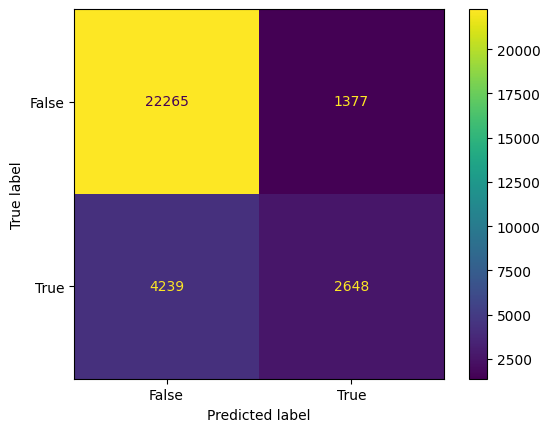

In [114]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

### Create a classification report

In [115]:
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

       False       0.84      0.94      0.89     23642
        True       0.66      0.38      0.49      6887

    accuracy                           0.82     30529
   macro avg       0.75      0.66      0.69     30529
weighted avg       0.80      0.82      0.80     30529



### Predict Probabilities

In [116]:
yprob_tr = best_rfc.predict_proba(xtrain)
yprob_ts = best_rfc.predict_proba(xtest)

In [117]:
best_rfc.classes_

array([False,  True])

In [118]:
yprob_ts[0:5]

array([[0.84417988, 0.15582012],
       [0.79527201, 0.20472799],
       [0.63870719, 0.36129281],
       [0.87086024, 0.12913976],
       [0.93072642, 0.06927358]])

In [119]:
ypred_ts

array([False, False, False, ..., False, False, False])

### Feature importance

In [120]:
imp = best_rfc.feature_importances_
imp

array([0.26128165, 0.10203971, 0.00397819, 0.05065682, 0.03092053,
       0.03741053, 0.12016432, 0.01214481, 0.01019436, 0.02132866,
       0.04723475, 0.01949625, 0.0767719 , 0.00359601, 0.0276179 ,
       0.00190364, 0.01397481, 0.02422107, 0.03370364, 0.02555606,
       0.07580437])

In [121]:
xtrain.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')

In [122]:
imp = pd.Series(imp)
imp

0     0.261282
1     0.102040
2     0.003978
3     0.050657
4     0.030921
5     0.037411
6     0.120164
7     0.012145
8     0.010194
9     0.021329
10    0.047235
11    0.019496
12    0.076772
13    0.003596
14    0.027618
15    0.001904
16    0.013975
17    0.024221
18    0.033704
19    0.025556
20    0.075804
dtype: float64

In [123]:
imp.index =  xtrain.columns
imp

loc                  0.261282
v(g)                 0.102040
ev(g)                0.003978
iv(g)                0.050657
n                    0.030921
v                    0.037411
l                    0.120164
d                    0.012145
i                    0.010194
e                    0.021329
b                    0.047235
t                    0.019496
lOCode               0.076772
lOComment            0.003596
lOBlank              0.027618
locCodeAndComment    0.001904
uniq_Op              0.013975
uniq_Opnd            0.024221
total_Op             0.033704
total_Opnd           0.025556
branchCount          0.075804
dtype: float64

In [124]:
imp = imp.sort_values(ascending=False)
imp

loc                  0.261282
l                    0.120164
v(g)                 0.102040
lOCode               0.076772
branchCount          0.075804
iv(g)                0.050657
b                    0.047235
v                    0.037411
total_Op             0.033704
n                    0.030921
lOBlank              0.027618
total_Opnd           0.025556
uniq_Opnd            0.024221
e                    0.021329
t                    0.019496
uniq_Op              0.013975
d                    0.012145
i                    0.010194
ev(g)                0.003978
lOComment            0.003596
locCodeAndComment    0.001904
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

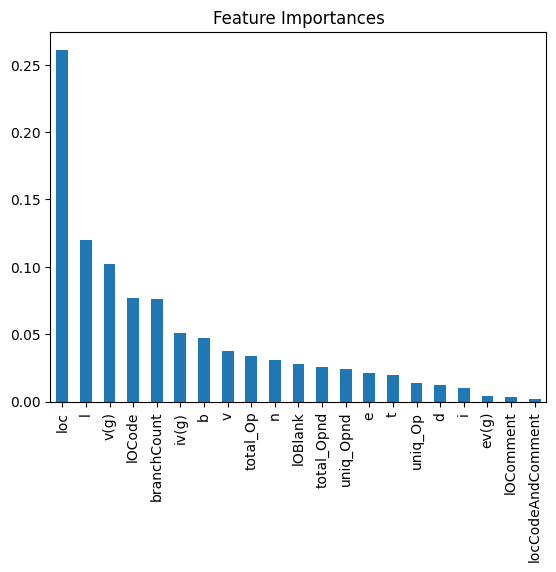

In [125]:
imp.plot(kind='bar', title='Feature Importances')

### Predicting out of sample data

In [126]:
xnew = pd.read_csv('test.csv')
xnew

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67837,169600,41.0,1.0,1.0,1.0,125.0,656.55,0.07,14.00,47.61,...,479.35,31,0,7,0,14.0,27.0,71.0,54.0,1.0
67838,169601,20.0,3.0,1.0,3.0,38.0,161.42,0.15,6.75,23.28,...,58.94,15,0,3,0,9.0,10.0,23.0,15.0,5.0
67839,169602,24.0,2.0,1.0,2.0,52.0,240.00,0.11,9.00,26.67,...,120.00,18,0,4,0,16.0,16.0,36.0,18.0,3.0
67840,169603,18.0,2.0,1.0,1.0,49.0,216.64,0.11,9.33,24.02,...,117.68,12,0,2,0,8.0,12.0,29.0,22.0,3.0


In [127]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

In [129]:
xnew_pre = x_pre.transform(xnew)


SpecificationError: nested renamer is not supported